In [1]:
# SETTINGS

number_topics = 25

# Extract text from a list of URLs

We use the library [Minet](https://github.com/medialab/minet). It's basically command lines; no Python required.

In [2]:
# Install Minet if needed
!pip install minet -U

Requirement already up-to-date: minet in c:\users\mathieu\anaconda3\lib\site-packages (0.51.6)


In [9]:
# Check the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['manual check'] == 'keep']

df.drop(columns=['manual check']).to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,discourse,area,manual check,domain,actor name,article title,article url,article description,total nr of results (best guess),query
0,0,bing,environment,arctic,keep,arcticwwf,,Arctic Climate Change | WWF Arctic,https://arcticwwf.org/work/climate/,The Arctic is warming at a rate of almost twic...,30600000,"((""environment"" OR ""environmental"") AND (""wast..."
1,2,bing,environment,arctic,keep,wwf,,Arctic | WWF,https://www.wwf.org.uk/where-we-work/arctic,The Arctic of the north pole is home to the ic...,30600000,"((""environment"" OR ""environmental"") AND (""wast..."
2,4,bing,environment,arctic,keep,arcticwwf,,Arctic | WWF Arctic,https://arcticwwf.org/,Pollution with an easy solution: Regulating un...,30600000,"((""environment"" OR ""environmental"") AND (""wast..."
3,5,bing,environment,arctic,keep,um,,The Arctic - Udenrigsministeriet,https://um.dk/en/foreign-policy/the-arctic/,The Kingdom of Denmark is centrally located in...,30600000,"((""environment"" OR ""environmental"") AND (""wast..."
4,6,bing,environment,arctic,keep,worldwildlife,,Arctic | Places | WWF,https://www.worldwildlife.org/places/arctic,6/4/2020 · Diverse landscapes—from the sea ice...,30600000,"((""environment"" OR ""environmental"") AND (""wast..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1772,3994,bing,sustainability,arctic norway,keep,thewaterfrontrestaurant,,Why Sustainable Fishing Is Important - The Wat...,https://thewaterfrontrestaurant.net/why-sustai...,2/29/2016 · Why Sustainable Fishing Is Importa...,1820000,"(""sustainability"" OR ""sustainable"") AND (""Sval..."
1773,3996,bing,sustainability,arctic norway,keep,sciencedirect,,Norwegian fisheries in the Svalbard zone since...,https://www.sciencedirect.com/science/article/...,9/1/2016 · The area around Svalbard is the wor...,1820000,"(""sustainability"" OR ""sustainable"") AND (""Sval..."
1774,3997,bing,sustainability,arctic norway,keep,tripadvisor,,"Sustainable luxury - Review of Funken Lodge, L...",https://www.tripadvisor.com/ShowUserReviews-g5...,2/15/2020 · Funken Lodge: Sustainable luxury -...,1820000,"(""sustainability"" OR ""sustainable"") AND (""Sval..."
1775,3998,bing,sustainability,arctic norway,keep,aramex,,Sustainability,https://www.aramex.com/es/en/annual-report/sus...,The Aramex approach to sustainability is under...,1820000,"(""sustainability"" OR ""sustainable"") AND (""Sval..."


## Download the content of URLs
This command line downloads the HTML of each page in a file identified with a hash key, and adds columns to the CSV "report.csv" with information about the process, as well as the hash key of the corresponding HTML file. Those files are in the "html" folder.

In [10]:
!minet fetch "article url" "01 data filtered.csv" -d html > "02 data with url connection report.csv"


Fetching pages:  10%|▉         | 176/1777 [00:08<00:59, 26.85url/s, 403=2, errors=0]


Fetching pages:  45%|████▍     | 792/1777 [00:36<00:36, 27.00url/s, 403=13, errors=3]


Fetching pages: 100%|██████████| 1777/1777 [02:11<00:00, 13.48url/s, 403=20, errors=32]


In [11]:
# Check the report file produced
df = pd.read_csv('02 data with url connection report.csv')
df.fillna('', inplace=True)
df

,result #,search engine,discourse,area,domain,actor name,article title,article url,article description,total nr of results (best guess),query,index,resolved,status,error,filename,mimetype,encoding
0,22,bing,environment,arctic,europa,,Arctic - International Issues - Environment - ...,https://ec.europa.eu/environment/international...,The Arctic is a key driver of the world ocean ...,30600000,"((""environment"" OR ""environmental"") AND (""wast...",11,,200.0,,9c94ccfa-03b1-465b-a487-d81c6232b220.html,text/html,utf-8
1,2,bing,environment,arctic,wwf,,Arctic | WWF,https://www.wwf.org.uk/where-we-work/arctic,The Arctic of the north pole is home to the ic...,30600000,"((""environment"" OR ""environmental"") AND (""wast...",1,,200.0,,839c7331-5616-4913-b1c0-9a89de14f9ad.html,text/html,utf-8
2,8,bing,environment,arctic,rcinet,,Arctic Canada needs better waste management sa...,https://www.rcinet.ca/eye-on-the-arctic/2021/0...,"3/23/2021 · Outdated facilities, lack of resou...",30600000,"((""environment"" OR ""environmental"") AND (""wast...",6,,200.0,,82353f2b-2859-416a-9a0e-54a85068246d.html,text/html,utf-8
3,5,bing,environment,arctic,um,,The Arctic - Udenrigsministeriet,https://um.dk/en/foreign-policy/the-arctic/,The Kingdom of Denmark is centrally located in...,30600000,"((""environment"" OR ""environmental"") AND (""wast...",3,,200.0,,0e82a381-f025-4b3a-a92b-e644772ef833.html,text/html,utf-8
4,43,bing,environment,arctic,investingnews,,Mining in the Arctic: The Beginnings of an Ind...,https://investingnews.com/daily/resource-inves...,8/23/2019 · The Arctic is a harsh and unforgiv...,30600000,"((""environment"" OR ""environmental"") AND (""wast...",21,,200.0,,fd0cb95d-41a2-43ec-a830-c399d5f49098.html,text/html,utf-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,3898,bing,green growth,arctic norway,choicehotels,,"Funken Lodge, an Ascend Hotel in Longyearbyen,...",https://www.choicehotels.com/norway/longyearby...,"3/7/2021 · Book now at the Funken Lodge, an As...",2970000,"((""sustainability"" OR ""sustainable"" OR ""green""...",1707,,,read-timeout,,,
1773,3907,bing,sustainability,arctic norway,eiu,,Global food sustainability is under threat - B...,https://foodsustainability.eiu.com/svalbard-ar...,"Deep within a mountain in Svalbard, a Norwegia...",1820000,"(""sustainability"" OR ""sustainable"") AND (""Sval...",1716,,,read-timeout,,,
1774,3984,bing,sustainability,arctic norway,ecolab,,2030 Impact Goals | Ecolab,https://www.ecolab.com/sustainability/sustaina...,The next 10 years are a crucial opportunity to...,1820000,"(""sustainability"" OR ""sustainable"") AND (""Sval...",1766,,,read-timeout,,,
1775,1655,bing,UN SDGs,faroe islands,tesla,,Electric Vehicle & Solar Incentives | Tesla,https://www.tesla.com/support/incentives,Several states and local utilities offer elect...,248000,"(""sustainable development goals"" OR ""sustainab...",916,,,read-timeout,,,


## Extract the text

In [31]:
!minet extract "02 data with url connection report.csv" -i html > "03 data with text content.csv"


Extracting content: 0 docs [00:00, ? docs/s]
Extracting content: 0 docs [00:00, ? docs/s, p=6]
Extracting content: 1 docs [00:00,  9.64 docs/s, p=6]
Extracting content: 3 docs [00:02,  1.20 docs/s, p=6]
Extracting content: 6 docs [00:02,  2.90 docs/s, p=6]
Extracting content: 12 docs [00:02,  7.30 docs/s, p=6]
Extracting content: 18 docs [00:02, 12.17 docs/s, p=6]
Extracting content: 27 docs [00:02, 21.31 docs/s, p=6]
Extracting content: 35 docs [00:02, 29.76 docs/s, p=6]
Extracting content: 42 docs [00:02, 35.71 docs/s, p=6]
Extracting content: 49 docs [00:03, 38.50 docs/s, p=6]
Extracting content: 59 docs [00:03, 50.76 docs/s, p=6]
Extracting content: 68 docs [00:03, 56.27 docs/s, p=6]
Extracting content: 75 docs [00:03, 51.21 docs/s, p=6]
Extracting content: 84 docs [00:03, 57.43 docs/s, p=6]
Extracting content: 91 docs [00:03, 60.25 docs/s, p=6]
Extracting content: 100 docs [00:03, 63.90 docs/s, p=6]
Extracting content: 107 docs [00:03, 61.46 docs/s, p=6]
Extracting content: 114 d

In [45]:
# Check the contents file produced
df = pd.read_csv('03 data with text content.csv')
df.fillna('', inplace=True)
df

,result #,search engine,discourse,area,domain,actor name,article title,article url,article description,total nr of results (best guess),...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
0,48,bing,environment,arctic,fas,,Changes in the Arctic: Background and Issues f...,https://fas.org/sgp/crs/misc/R41153.pdf,The geopolitical environment for the Arctic ha...,30600000,...,,,,,,,,,,
1,55,bing,environment,arctic,fas,,Changes in the Arctic: Background and Issues f...,https://fas.org/sgp/crs/misc/R41153.pdf,The geopolitical environment for the Arctic ha...,30600000,...,,,,,,,,,,
2,47,bing,environment,arctic,foreignpolicy,,"Forget Greenland, the Faroe Islands Are the Ne...",https://foreignpolicy.com/2020/12/07/forget-gr...,"12/7/2020 · With the Arctic ice melting, and t...",30600000,...,https://foreignpolicy.com/2020/12/07/forget-gr...,"Forget Greenland, There’s a New Strategic Gate...",The Faroe Islands have a history of trading wi...,"Jenis av Rana, foreign minister of the Faroe I...",,Regin Winther Poulsen,Morning Brief|Argument|Argument|Report|Report|...,,2020-12-07,Foreign Policy
3,22,bing,environment,arctic,europa,,Arctic - International Issues - Environment - ...,https://ec.europa.eu/environment/international...,The Arctic is a key driver of the world ocean ...,30600000,...,,Arctic,The EU participates in international efforts t...,Accessibility tools\nService tools\nLanguage s...,,,,environment|international|cooperation|arctic|f...,,International Issues - Environment - European ...
4,7,bing,environment,arctic,weforum,,What the melting Arctic means for the world | ...,https://www.weforum.org/agenda/2020/01/arctic-...,3/23/2021 · The Arctic is an incredibly import...,30600000,...,https://www.weforum.org/agenda/2020/01/arctic-...,What the melting Arctic means for the world,"The Arctic is turning from white to blue, abso...","- Since the 1970s, we have lost 75% of the vol...",,Robin Pomeroy,Arctic,World Economic Forum|WEF|Davos|Klaus Schwab|gl...,2020-01-23,World Economic Forum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1985,bing,sustainability,faroe islands,kingspan,,Sustainability and responsibility | Kingspan I...,https://www.kingspan.com/gb/en-gb/about-kingsp...,"Sustainability issues, however, extend far bey...",1810000,...,https://www.kingspan.com/gb/en-gb/about-kingsp...,Sustainability,We have a long-term commitment to sustainabili...,We are conscious of the nature of the raw mate...,,,,about kingspan|kingspan in the UK|UK|Great Bri...,,Kingspan | Great Britain
1773,3997,bing,sustainability,arctic norway,tripadvisor,,"Sustainable luxury - Review of Funken Lodge, L...",https://www.tripadvisor.com/ShowUserReviews-g5...,2/15/2020 · Funken Lodge: Sustainable luxury -...,1820000,...,,"Sustainable luxury - Review of Funken Lodge, L...",Funken Lodge: Sustainable luxury - See 206 tra...,It’s hard to find the words to describe just h...,,,,Funken Lodge|Longyearbyen|Norway|Sustainable l...,2020-02-15,"Review of Funken Lodge, Longyearbyen, Norway -..."
1774,2678,bing,UN SDGs,Sami,oecd,,Linking Indigenous communities with regional d...,http://www.oecd.org/regional/regional-policy/i...,Indigenous peoples represent about 5% of the w...,930000,...,,Linking Indigenous communities with regional d...,This project was launched on 19 September 2017...,This project was launched on 19 September 2017...,,,,indgenous peoples|indigenous communities|indig...,,OECD
1775,3919,bing,sustainability,arctic norway,secretatlastravel,,"Arctic Cruises, Private Expeditions ... - Secr...",https://secretatlastravel.com/,Svalbard Expedition Micro Cruises 2021 and 202...,1820000,...,https://www.secretatlastravel.com/,Secret Atlas | Arctic Cruises & Photo Tours on...,Cruises on Small Expedition Vessels to the Arc...,Welcome\nWe are a team of passionate explorers...,,,Article|Svalbard|Travel Tips|Article|Svalbard|...,,2019-08-22,Secret Atlas


# Group content by actor

In [46]:
actor_dict = {}
for index, row in df.iterrows():
    if row['actor name']:
        actor_id = row['actor name']
    else:
        actor_id = row['domain']
        print(actor_id)
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['discourse: Climate change'] = 'False'
        actor_obj['discourse: Environment'] = 'False'
        actor_obj['discourse: Green growth'] = 'False'
        actor_obj['discourse: Sustainability'] = 'False'
        actor_obj['discourse: UN SDGs'] = 'False'
        actor_obj['area: Arctic'] = 'False'
        actor_obj['area: Arctic Norway'] = 'False'
        actor_obj['area: Extended Arctic'] = 'False'
        actor_obj['area: Faroed Islands'] = 'False'
        actor_obj['area: Greenland'] = 'False'
        actor_obj['area: Iceland'] = 'False'
        actor_obj['area: Nunavut'] = 'False'
        actor_obj['area: Sami'] = 'False'
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '

    if row['discourse'] == 'Climate change':
        actor_obj['discourse: Climate change'] = 'True'
    if row['discourse'] == 'environment':
        actor_obj['discourse: Environment'] = 'True'
    if row['discourse'] == 'green growth':
        actor_obj['discourse: Green growth'] = 'True'
    if row['discourse'] == 'sustainability':
        actor_obj['discourse: Sustainability'] = 'True'
    if row['discourse'] == 'UN SDGs':
        actor_obj['discourse: UN SDGs'] = 'True'
    if row['area'] == 'arctic':
        actor_obj['area: Arctic'] = 'True'
    if row['area'] == 'arctic norway':
        actor_obj['area: Arctic Norway'] = 'True'
    if row['area'] == 'extended arctic':
        actor_obj['area: Extended Arctic'] = 'True'
    if row['area'] == 'faroe islands':
        actor_obj['area: Faroed Islands'] = 'True'
    if row['area'] == 'greenland':
        actor_obj['area: Greenland'] = 'True'
    if row['area'] == 'Iceland':
        actor_obj['area: Iceland'] = 'True'
    if row['area'] == 'Nunavut':
        actor_obj['area: Nunavut'] = 'True'
    if row['area'] == 'Sami':
        actor_obj['area: Sami'] = 'True'
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

fas
fas
foreignpolicy
europa
weforum
harvard
rcinet
nasa
investingnews
wwf
panda
um
defensenews
worldwildlife
maritime-executive
arcticwwf
uwyo
weforum
gia
noaa
nwf
energy
gizmodo
ucalgary
nsidc
arcticwwf
ucalgary
harvard
un
nsidc
heritage
geology
thediplomat
nwf
nytimes
bloomberg
nike
nasa
heritage
rcinet
thenewhumanitarian
dezeen
mmc
npr
noaa
biologicaldiversity
foreignaffairs
theatlantic
arcticwwf
arctic
nasa
greenfacts
unep
ospar
uarctic
state
foreignpolicy
yale
um
weforum
climate
journalsofindia
harvard
arcticyearbook
nature
csis
norden
rcinet
state
polarconnection
um
arcticwwf
military
visualcapitalist
nsf
c2g2
nasa
arcticyearbook
ulaval
weforum
arcticfrontiers
dtu
noaa
euractiv
un
arcticcentre
inuitcircumpolar
unep
highnorthnews
inuitcircumpolar
visualcapitalist
government
sciencedirect
polarconnection
climate
nationalinterest
uarctic
inuitcircumpolar
gov
euobserver
opportunitydesk
sciencemag
hurtigruten
nature
interacademies
save-the-arctic
norden
arcticbiodiversity
moderndiplo

3m
nationalgeographic
guidetoiceland
iceland
iceland
government
arctic-council
cia
unep
thegreenprogram
europa
un
un
hi
matadornetwork
salmon-from-the-faroe-islands
ru
lu
circularsolutions
hihostels
blueandgreentomorrow
bluelagoon
nbim
thegreenprogram
iceland
msc
europa
blueandgreentomorrow
europa
iwgia
treehugger
thegreenprogram
cer-rec
canada
northvolt
arctic-council
eco-business
boliden
nordregio
hiddeniceland
rcinet
rcinet
un
huffpost
helloscience
gov
worldatlas
usaid
ejatlas
stantec
investingnews
mongabay
learnalberta
siceland
matorka
rcaanc-cirnac
stantec
cbc
rcaanc-cirnac
gov
nrcan
ctvnews
infrastructure
miragenews
modernfarmer
reykjavikforum
un
asc-csa
mromagazine
irpp
learnalberta
aadnc-aandc
un
un
theglobeandmail
oag-bvg
aadnc-aandc
newswire
cambridge
irpp
canadianminingjournal
cbc
thenarwhal
thestar
thenarwhal
biomedcentral
miragenews
gov
justice
tesla
infrastructure
theglobeandmail
un
irpp
gov
newswire
un
thecanadianencyclopedia
sciencedaily
un
un
businessinsider
wsp
biomed

In [47]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("04 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,area: Extended Arctic,area: Faroed Islands,area: Greenland,area: Iceland,area: Nunavut,area: Sami
fas,fas,https://fas.org/sgp/crs/misc/R41153.pdf https:...,. . . . .,True,True,True,True,False,True,False,False,False,False,False,False,False
foreignpolicy,foreignpolicy,https://foreignpolicy.com/2020/12/07/forget-gr...,"Jenis av Rana, foreign minister of the Faroe I...",True,True,False,False,False,True,False,False,False,True,False,False,False
europa,europa,https://ec.europa.eu/environment/international...,Accessibility tools\nService tools\nLanguage s...,True,True,True,True,True,True,True,True,True,True,True,False,True
weforum,weforum,https://www.weforum.org/agenda/2020/01/arctic-...,"- Since the 1970s, we have lost 75% of the vol...",True,True,True,True,True,True,False,False,False,True,True,False,False
harvard,harvard,https://www.hsph.harvard.edu/news/press-releas...,Harvard study finds circumpolar rivers most re...,True,True,True,True,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
carboncraftgroup,carboncraftgroup,https://carboncraftgroup.com/svalbard-global-s...,Acting as the “Emergency Rescue Plan” in case ...,False,False,False,True,False,False,True,False,False,False,False,False,False
iberdrola,iberdrola,https://www.iberdrola.com/social-commitment/su...,The survival of marine fauna depends on sustai...,False,False,False,True,False,False,True,False,False,False,False,False,False
hurtigrutensvalbard,hurtigrutensvalbard,https://hurtigrutensvalbard.com/en/about-svalb...,Share:\nThe world leader in exploration travel...,False,False,False,True,False,False,True,False,False,False,False,False,False
sunchemical,sunchemical,https://www.sunchemical.com/sustainability/sus...,Our annual Corporate Sustainability Report foc...,False,False,False,True,False,False,True,False,False,False,False,False,False


# LDA: extract topics

In [48]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [49]:
# Source file (CSV)
source_file = "04 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [50]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [51]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [52]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
1084.482629933059   marginal
1082.6454329193648   note
853.0128346217153   project
712.9122578388394   subsection
554.1145365472173   minister
524.5209480190814   board
416.7132485655592   section
375.4794736200997   commission
337.83154257332075   paragraph
324.28685275774   respect
319.04485310659476   referred
306.27918655488725   claim
284.9338980593116   act
264.2713699922146   land
258.2804664498108   designated
257.3129010906697   use
239.36625574523595   area
235.48429102309822   responsible
235.46036450290438   plan
218.36529784441302   federal
200.2524695800264   panel
198.86547430705775   assessment
196.2110391474772   proponent
193.06506906356225   public
190.4992293724254   review
 
# TOPIC_1:
18.963034323017105   ranked
5.873641670728419   adjusted
4.683323996096906   canada
4.164260144838596   savings
4.130464400642206   arctic
2.6670738772369713   climate
2.4344662950214437   ice
2.34394253855032   eu
2.329506050317951   development
2.2535693060185493   total

103.35819375508189   walrus
98.09622090709769   protected
 
# TOPIC_12:
292.6611505371492   mining
216.20172618484068   company
206.54311512005208   gold
202.63182627809127   new
195.41863479621887   project
162.97084893541262   year
151.11156702146366   site
145.57048615499963   work
136.25555159167902   development
133.45846065156078   mineral
132.79987259695008   process
130.65761748876037   operations
122.28853300930194   production
122.2405448505399   time
120.82261378466329   think
120.19767136215768   just
118.68279733607139   exploration
116.50444707941149   world
114.67701045228279   years
112.52296821653199   open
104.85997842360187   industry
102.99826492329949   like
102.31778773771336   000
102.31012759006862   people
100.48539472160802   arctic
 
# TOPIC_13:
296.90077441146383   arctic
279.98573666428774   vary
273.40315585156065   according
267.9330477961659   environmental
267.21682156993575   geographical
255.4524645541867   cultural
254.46897690794842   scientists
249

388.68695238054835   2018
315.2494126715768   water
300.15239589592255   2019
296.5501344503285   10
277.89929043095105   particles
252.21540259374885   size
250.94795647478725   microplastic
230.07261277073698   effects
222.49893794406867   studies
212.92371146112342   exposure
210.27056632447713   plastics
199.12605096324407   study
197.1084497812993   2015
193.52783923375594   2016
190.92840861070044   table
189.60793069182725   used
184.37038102453312   environment
183.5348637494926   canada
183.05042245567597   surface
175.98642256142386   marine
173.49210919146813   reported
 


,topic,word,weight
0,TOPIC_0,marginal,1084.482630
1,TOPIC_0,note,1082.645433
2,TOPIC_0,project,853.012835
3,TOPIC_0,subsection,712.912258
4,TOPIC_0,minister,554.114537
...,...,...,...
620,TOPIC_24,environment,184.370381
621,TOPIC_24,canada,183.534864
622,TOPIC_24,surface,183.050422
623,TOPIC_24,marine,175.986423


In [53]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [54]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,...,TOPIC_15,TOPIC_16,TOPIC_17,TOPIC_18,TOPIC_19,TOPIC_20,TOPIC_21,TOPIC_22,TOPIC_23,TOPIC_24
0,fas,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,...,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000
1,foreignpolicy,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.000003,0.405120,0.000003,0.000003,0.000003,0.000003,0.592412,0.000003,0.000003,0.000003
2,europa,0.000003,0.000003,0.406401,0.000003,0.000003,0.000003,0.000003,0.050061,0.000307,...,0.000003,0.000003,0.000003,0.000003,0.044862,0.000003,0.337566,0.000245,0.003034,0.003254
3,weforum,0.000019,0.000019,0.083546,0.380542,0.000019,0.000019,0.000019,0.113949,0.000019,...,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.175183,0.000019,0.000019,0.000019
4,harvard,0.000012,0.000012,0.133310,0.000012,0.000012,0.000012,0.000012,0.030316,0.000012,...,0.000012,0.641432,0.000012,0.001877,0.000012,0.000012,0.005117,0.000012,0.000012,0.018353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,carboncraftgroup,0.000194,0.000194,0.000194,0.000194,0.000194,0.000194,0.000194,0.000194,0.000194,...,0.000194,0.644364,0.000194,0.000194,0.000194,0.000194,0.144861,0.000194,0.000194,0.000194
741,iberdrola,0.000145,0.000145,0.216406,0.000145,0.000145,0.000145,0.000145,0.206819,0.000145,...,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.573575,0.000145
742,hurtigrutensvalbard,0.000435,0.000435,0.186829,0.574154,0.000435,0.000435,0.013340,0.000435,0.000435,...,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435
743,sunchemical,0.000645,0.000645,0.984516,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,...,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645


In [55]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,fas,TOPIC_0,0.04000
1,fas,TOPIC_1,0.04000
2,fas,TOPIC_2,0.04000
3,fas,TOPIC_3,0.04000
4,fas,TOPIC_4,0.04000
...,...,...,...
18620,secretatlastravel,TOPIC_20,0.00037
18621,secretatlastravel,TOPIC_21,0.00037
18622,secretatlastravel,TOPIC_22,0.00037
18623,secretatlastravel,TOPIC_23,0.00037


In [56]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("05-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("05-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("05-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [57]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,fas,https://fas.org/sgp/crs/misc/R41153.pdf https:...,. . . . .,True,True,True,True,False,True,False,...,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000
1,foreignpolicy,https://foreignpolicy.com/2020/12/07/forget-gr...,"Jenis av Rana, foreign minister of the Faroe I...",True,True,False,False,False,True,False,...,0.000003,0.405120,0.000003,0.000003,0.000003,0.000003,0.592412,0.000003,0.000003,0.000003
2,europa,https://ec.europa.eu/environment/international...,Accessibility tools\nService tools\nLanguage s...,True,True,True,True,True,True,True,...,0.000003,0.000003,0.000003,0.000003,0.044862,0.000003,0.337566,0.000245,0.003034,0.003254
3,weforum,https://www.weforum.org/agenda/2020/01/arctic-...,"- Since the 1970s, we have lost 75% of the vol...",True,True,True,True,True,True,False,...,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.175183,0.000019,0.000019,0.000019
4,harvard,https://www.hsph.harvard.edu/news/press-releas...,Harvard study finds circumpolar rivers most re...,True,True,True,True,False,True,False,...,0.000012,0.641432,0.000012,0.001877,0.000012,0.000012,0.005117,0.000012,0.000012,0.018353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,carboncraftgroup,https://carboncraftgroup.com/svalbard-global-s...,Acting as the “Emergency Rescue Plan” in case ...,False,False,False,True,False,False,True,...,0.000194,0.644364,0.000194,0.000194,0.000194,0.000194,0.144861,0.000194,0.000194,0.000194
824,iberdrola,https://www.iberdrola.com/social-commitment/su...,The survival of marine fauna depends on sustai...,False,False,False,True,False,False,True,...,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.573575,0.000145
825,hurtigrutensvalbard,https://hurtigrutensvalbard.com/en/about-svalb...,Share:\nThe world leader in exploration travel...,False,False,False,True,False,False,True,...,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435,0.000435
826,sunchemical,https://www.sunchemical.com/sustainability/sus...,Our annual Corporate Sustainability Report foc...,False,False,False,True,False,False,True,...,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645


In [58]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("06 Actors and their topics.csv", index=False)

# Export LDA networks

In [59]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "07 Words and topics.gexf")

In [60]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "08 Actors and topics.gexf")

# UMAP after the topics

In [61]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [65]:
# Load data
df = pd.read_csv("06 Actors and their topics.csv")
df = df.dropna()

In [66]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14",
        "topic_15",
        "topic_16",
        "topic_17",
        "topic_18",
        "topic_19",
        "topic_20",
        "topic_21",
        "topic_22",
        "topic_23",
        "topic_24"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [67]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(828, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

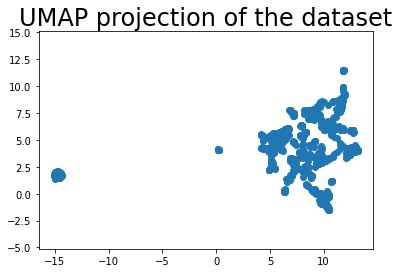

In [69]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [70]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("09 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')